<a href="https://colab.research.google.com/github/Valerie-Perea/DDDS-Cohort-16-Projects/blob/main/Project_6_VP_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [78]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

## Data Collection

* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.


In [79]:
url_x = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url_dog = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [80]:
feat_x = pd.read_pickle(r"https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle")

In [81]:
targ_y = pd.read_pickle(r"https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle")

In [82]:
from PIL import Image
import requests
from io import BytesIO

url_dog = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"

response = requests.get(url_dog, stream=True)
if response.status_code == 200 and 'image' in response.headers.get('Content-Type', ''):
    try:
        img = Image.open(BytesIO(response.content))
        img.load()  # Force actual image loading
        img.show()
    except Exception as e:
        print("Image loading failed:", e)
else:
    print("Failed to retrieve a valid image.")

Failed to retrieve a valid image.


In [83]:
with open("debug_image.jpg", "wb") as f:
    f.write(response.content)
print("Saved image as debug_image.jpg")

Saved image as debug_image.jpg


In [84]:
import numpy as np

# Count each label
unique, counts = np.unique(y, return_counts=True)

# Map to readable labels
label_map = {1: 'Cat', 0: 'Dog'}
label_counts = {label_map[k]: v for k, v in zip(unique, counts)}

# Print results
for label, count in label_counts.items():
    print(f"{label}s: {count}")

Dogs: 12470
Cats: 12476


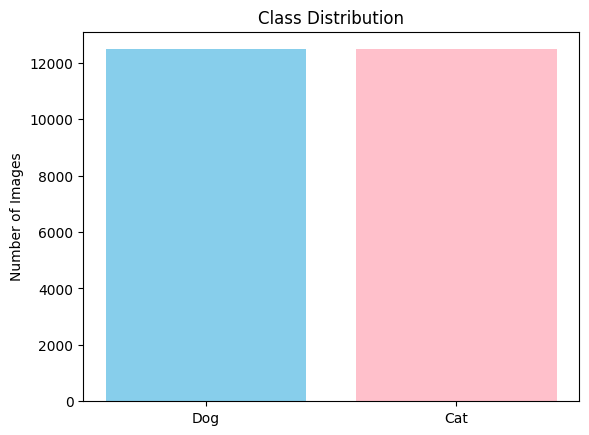

In [85]:
import matplotlib.pyplot as plt

labels, counts = zip(*label_counts.items())
plt.bar(labels, counts, color=['skyblue', 'pink'])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

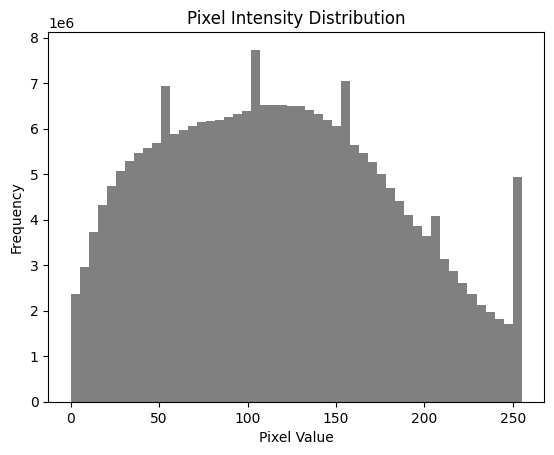

In [86]:
plt.hist(X.ravel(), bins=50, color='gray')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [87]:
features = feat_x / 255

In [88]:
target = targ_y

In [89]:
unique_values = list(set(target))
print(unique_values)

[0, 1]


In [90]:
features.shape

(24946, 100, 100, 1)

In [91]:
features[0]

array([[[0.37254902],
        [0.36862745],
        [0.38431373],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.36078431],
        [0.35686275],
        [0.37254902],
        ...,
        [0.66666667],
        [0.6745098 ],
        [0.67058824]],

       [[0.34901961],
        [0.35686275],
        [0.36078431],
        ...,
        [0.64705882],
        [0.6627451 ],
        [0.6627451 ]],

       ...,

       [[0.32941176],
        [0.29803922],
        [0.28627451],
        ...,
        [0.52941176],
        [0.64313725],
        [0.60392157]],

       [[0.32156863],
        [0.30980392],
        [0.27843137],
        ...,
        [0.55686275],
        [0.5254902 ],
        [0.6       ]],

       [[0.31372549],
        [0.33333333],
        [0.33333333],
        ...,
        [0.59215686],
        [0.57254902],
        [0.54117647]]])

Our pictures are 100 by 100. We can add a third array (100, 100, 1) because it is in greyscale. The test image is (x, x, 3) because it is a color image. So we have to convert the grey scale to the color. Use pillow to resize and change color.

In order to feed this to the neural network, we need a 4-dimensional network so we have to add another dimension.

## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot a few ( >5 ) of the images in X using `plt.imshow()`.

* Look at the response values in y for those images.

* Hint: you may want to start with a random subset to get familiar with the process of building a NN.  Then go through the process again with the full set.



In [92]:
features.shape

(24946, 100, 100, 1)

In [93]:
len(features)

24946

In [94]:
feat_array = np.zeros((24946, 100, 100, 3))
result = feat_array[:, :, :, 0]  # Picks the first element in the third dimension
print(result.shape) # Output: (106, 106)

(24946, 100, 100)


In [95]:
len(target)

24946

In [96]:
import numpy as np

targ_array= np.array(target)

print(targ_array)
print(type(targ_array))


[0 1 1 ... 1 0 1]
<class 'numpy.ndarray'>


In [97]:
targ_array.shape

(24946,)

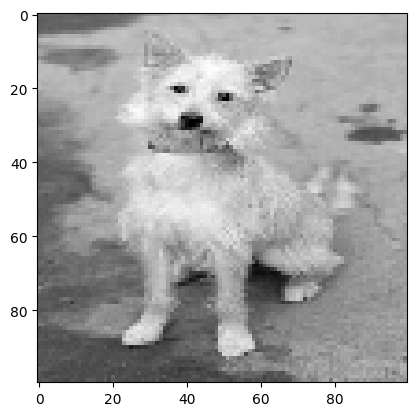

In [98]:
plt.imshow(features[0], cmap = plt.cm.gray)

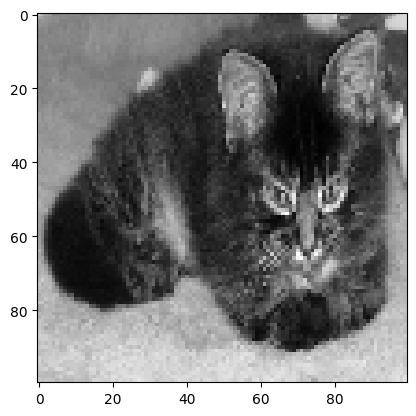

In [99]:
plt.imshow(features[1], cmap = plt.cm.gray)

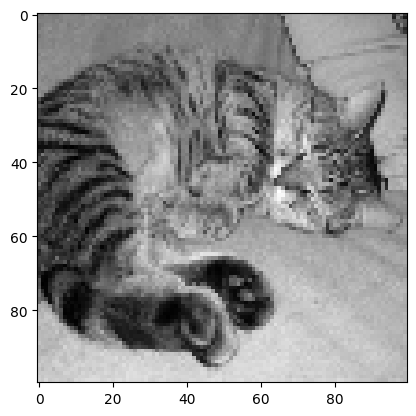

In [100]:
plt.imshow(features[2], cmap = plt.cm.gray)

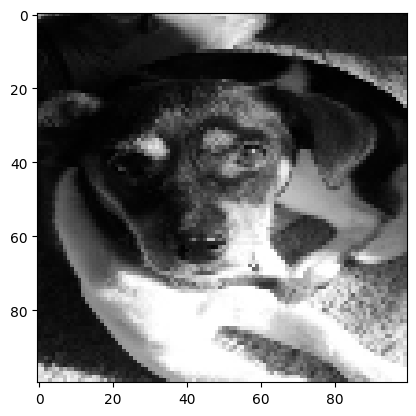

In [101]:
plt.imshow(features[3], cmap = plt.cm.gray)

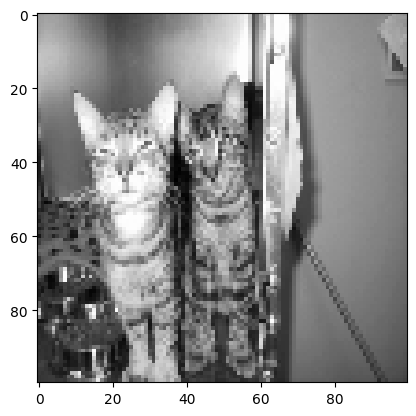

In [102]:
plt.imshow(features[24000], cmap = plt.cm.gray)

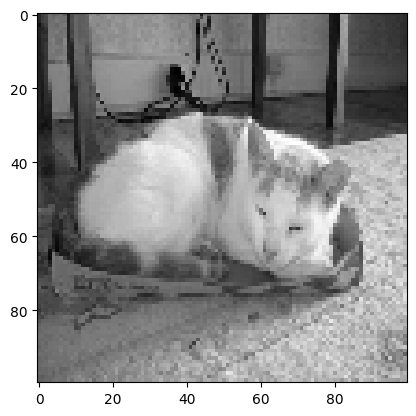

In [103]:
plt.imshow(features[999], cmap = plt.cm.gray)

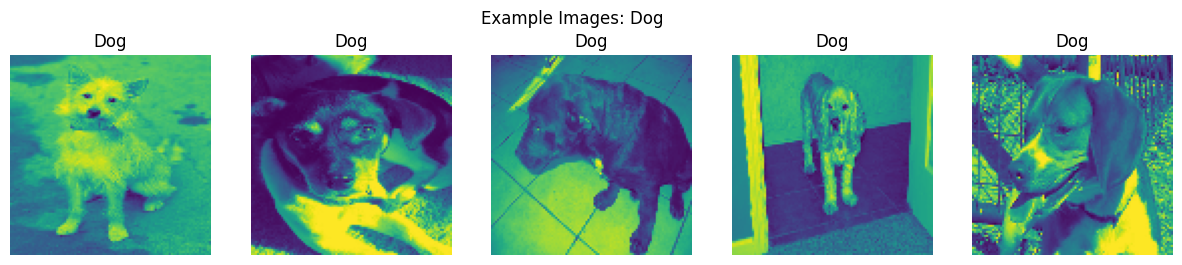

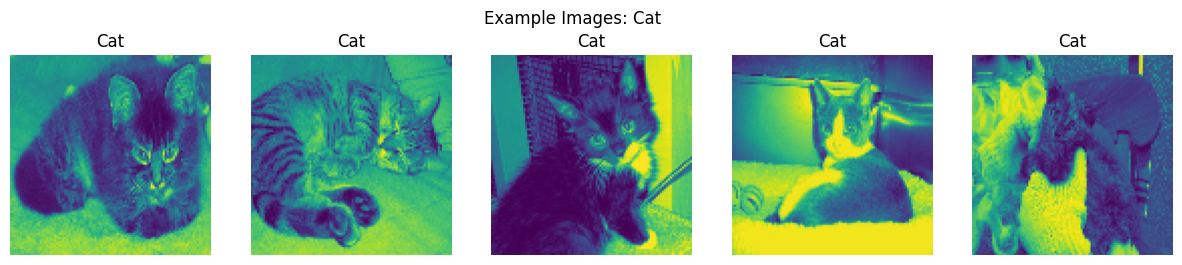

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(X, y, label=0, label_name="Cat", count=5):
    y = np.array(y).flatten()  # Ensure y is 1D array
    idxs = np.where(y == label)[0][:count]  # Find indices of images with the label
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(idxs):
        plt.subplot(1, count, i + 1)
        plt.imshow(X[idx])
        plt.title(label_name)
        plt.axis('off')
    plt.suptitle(f"Example Images: {label_name}")
    plt.show()

# Example usage:
show_sample_images(X, y, label=0, label_name="Dog")
show_sample_images(X, y, label=1, label_name="Cat")


## Data Processing



* Split X and y into training and testing sets.

*  Build a convolutional neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Plot the distribution of probabilities for the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: [numpy.reshape]( https://numpy.org/doc/stable/reference/generated/numpy.reshape.html )

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



### Model with flattening

In [105]:
feat_array = np.zeros((24946, 100, 100, 3))
result = feat_array[:, :, :, 0]  # Picks the first element in the third dimension
print(result.shape)

(24946, 100, 100)


In [106]:
x_train, x_test, y_train, y_test = train_test_split(features, targ_array, test_size=0.2, random_state=42)

In [107]:
(
  x_train.shape,
  y_train.shape,
  x_test.shape,
  y_test.shape
)

((19956, 100, 100, 1), (19956,), (4990, 100, 100, 1), (4990,))

In [108]:
model = Sequential()

# Flatten input data into a 1D structure
model.add(Flatten())

# Define first hidden layers
model.add(
  Dense(
    name = "hidden1",
    units = 144,
    activation = 'relu' ,
  )
)

# Add second hidden layer
model.add(
  Dense(
    name = "hidden2",
    units = 144,
    activation = 'relu' ,
  )
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 10,
    activation = 'softmax' ,
  )
)

In [109]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

In [110]:
history = model.fit(x_train, y_train, epochs=10) ;

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5116 - loss: 0.9300
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5644 - loss: 0.6831
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5836 - loss: 0.6756
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5969 - loss: 0.6670
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6021 - loss: 0.6628
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6014 - loss: 0.6622
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6140 - loss: 0.6565
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6103 - loss: 0.6554
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6111 - loss: 0.6564
Epoch 10/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6182 - loss: 0.6540


In [111]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 144)            │     1,440,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 144)            │        20,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,387,424 (16.74 MB)

 Trainable params: 1,462,474 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,924,950 (11.16 MB)

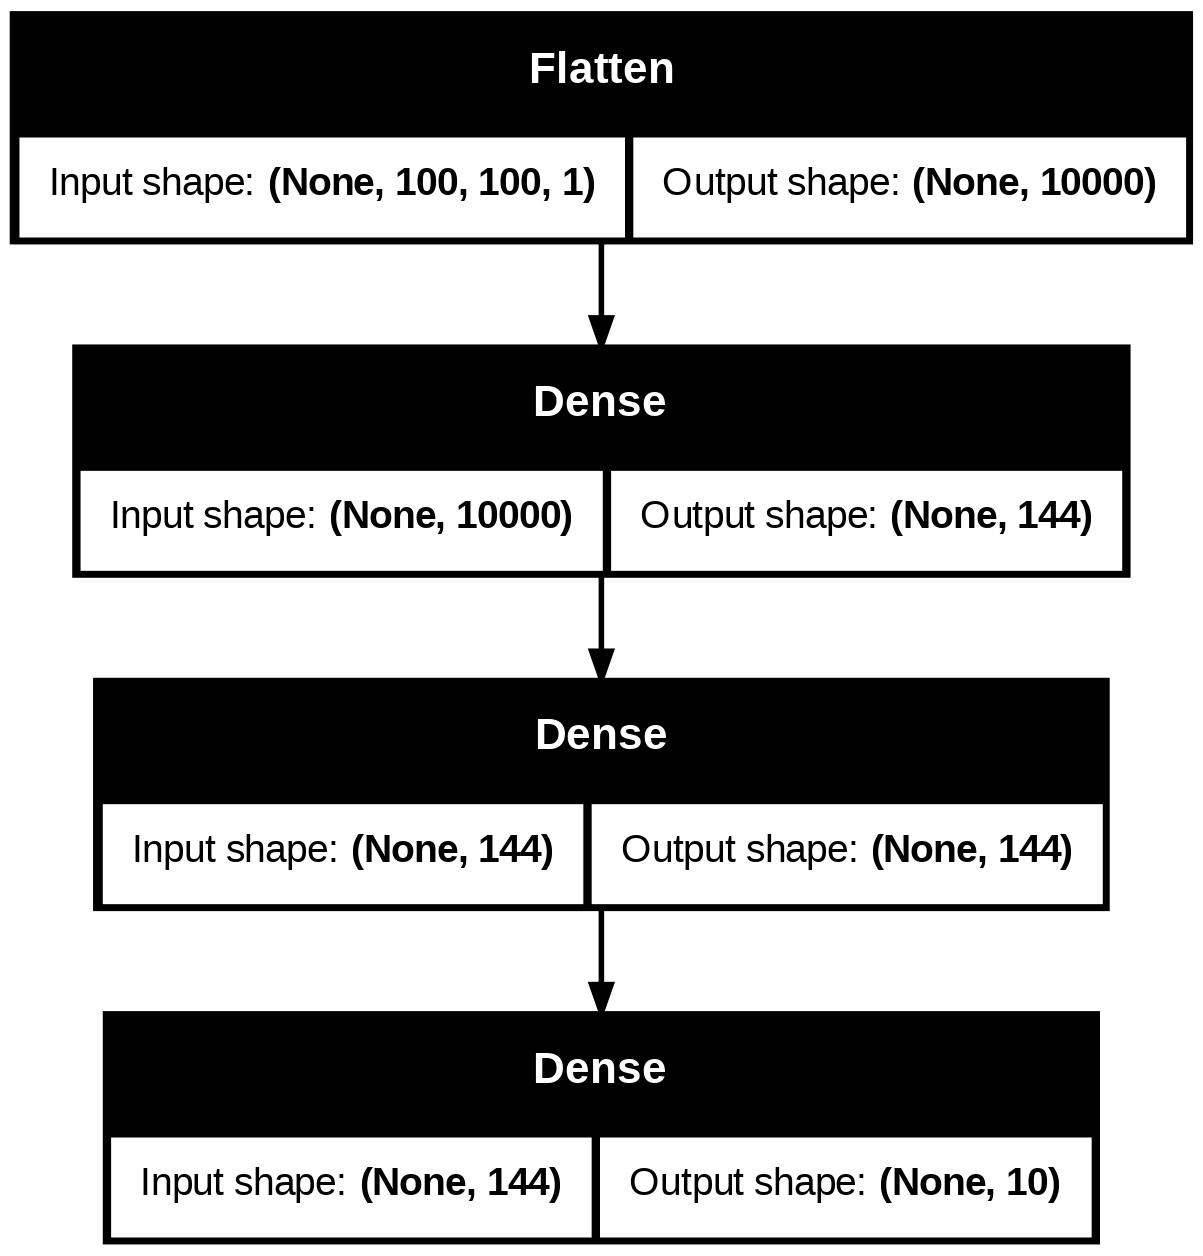

In [112]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [113]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6122 - loss: 0.6587


0.6174348592758179

## Confusion Matrix helps us understand how many true positives vs negatives we are seeing with our model

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 600x600 with 0 Axes>

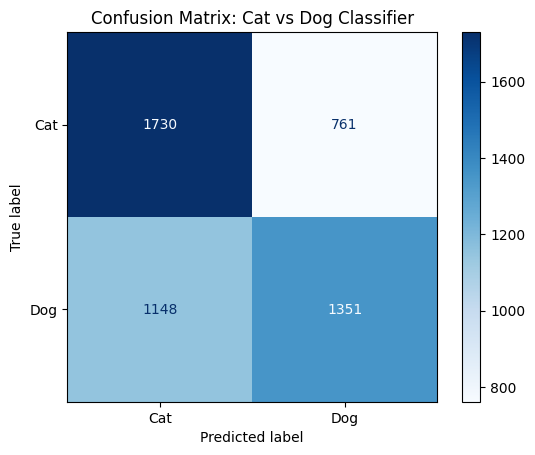

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict classes on test set
y_pred_prob = model.predict(x_test)

# If your model has 2 output units (softmax)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# If your model has 1 output unit (sigmoid), use this instead:
# y_pred_classes = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Step 3: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Cat vs Dog Classifier")
plt.show()


In [116]:
print(cm)

[[1730  761]
 [1148 1351]]


## ROC Curve

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC: 0.656


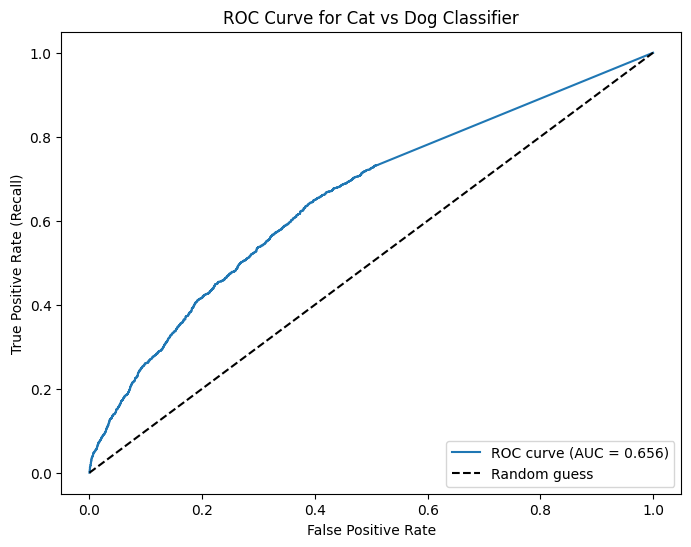

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get predicted probabilities for the positive class (dog or cat depending on label)
y_pred_prob = model.predict(x_test)

# If your output layer has 2 units (softmax), take the probability of class 1:
# y_pred_prob_pos = y_pred_prob[:, 1]

# If your output layer is a single sigmoid output, use directly:
# y_pred_prob_pos = y_pred_prob.flatten()

# For example, if softmax output:
y_pred_prob_pos = y_pred_prob[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_pos)

# Step 3: Compute AUC
auc = roc_auc_score(y_test, y_pred_prob_pos)
print(f"AUC: {auc:.3f}")

# Step 4: Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Cat vs Dog Classifier")
plt.legend(loc="lower right")
plt.show()


In [118]:
predictions = model.predict(x_test)
print(predictions[257])

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[5.6390643e-01 4.3600613e-01 1.3551163e-05 9.3173439e-06 1.0793887e-05
 9.8500050e-06 6.3615157e-06 1.5178015e-05 1.3824578e-05 8.3881250e-06]


In [119]:
import pickle
import requests

# Helper function to load pickle files from URL
def load_pickle_from_url(url):
    response = requests.get(url)
    response.raise_for_status()
    return pickle.loads(response.content)

url_x = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

X = load_pickle_from_url(url_x)
y = load_pickle_from_url(url_y)


In [120]:
from PIL import Image
from io import BytesIO

url_dog = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'
response = requests.get(url_dog)
img = Image.open(BytesIO(response.content))
img = img.resize((X.shape[1], X.shape[2]))  # Resize to training shape
img_array = np.array(img) / 255.0  # Normalize
img_array = img_array.reshape(-1, X.shape[1], X.shape[2], X.shape[3])  # Add batch dimension

prediction = model.predict(img_array)
print("Prediction:", "Dog" if prediction[0][0] > 0.5 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction: Dog


### Model using 2d convulutional layers

In [121]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(
    filters=32, kernel_size=(3,3), activation='relu', input_shape=x_train.shape[1:]
))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(
    filters=64, kernel_size=(3,3), activation='relu'
))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary output

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5926 - loss: 0.6598 - val_accuracy: 0.7352 - val_loss: 0.5336
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7563 - loss: 0.5040 - val_accuracy: 0.7761 - val_loss: 0.4801
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8035 - loss: 0.4200 - val_accuracy: 0.7858 - val_loss: 0.4682
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8518 - loss: 0.3333 - val_accuracy: 0.7733 - val_loss: 0.4912
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8969 - loss: 0.2503 - val_accuracy: 0.7703 - val_loss: 0.5385
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9432 - loss: 0.1478 - val_accuracy: 0.7766 - val_loss: 0.6298
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9761 - loss: 0.0756 - val_accuracy: 0.7758 - val_loss: 0.8732
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9892 - loss: 0.0379 - val_accu

In [130]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_acc

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 1.0267


0.7881763577461243

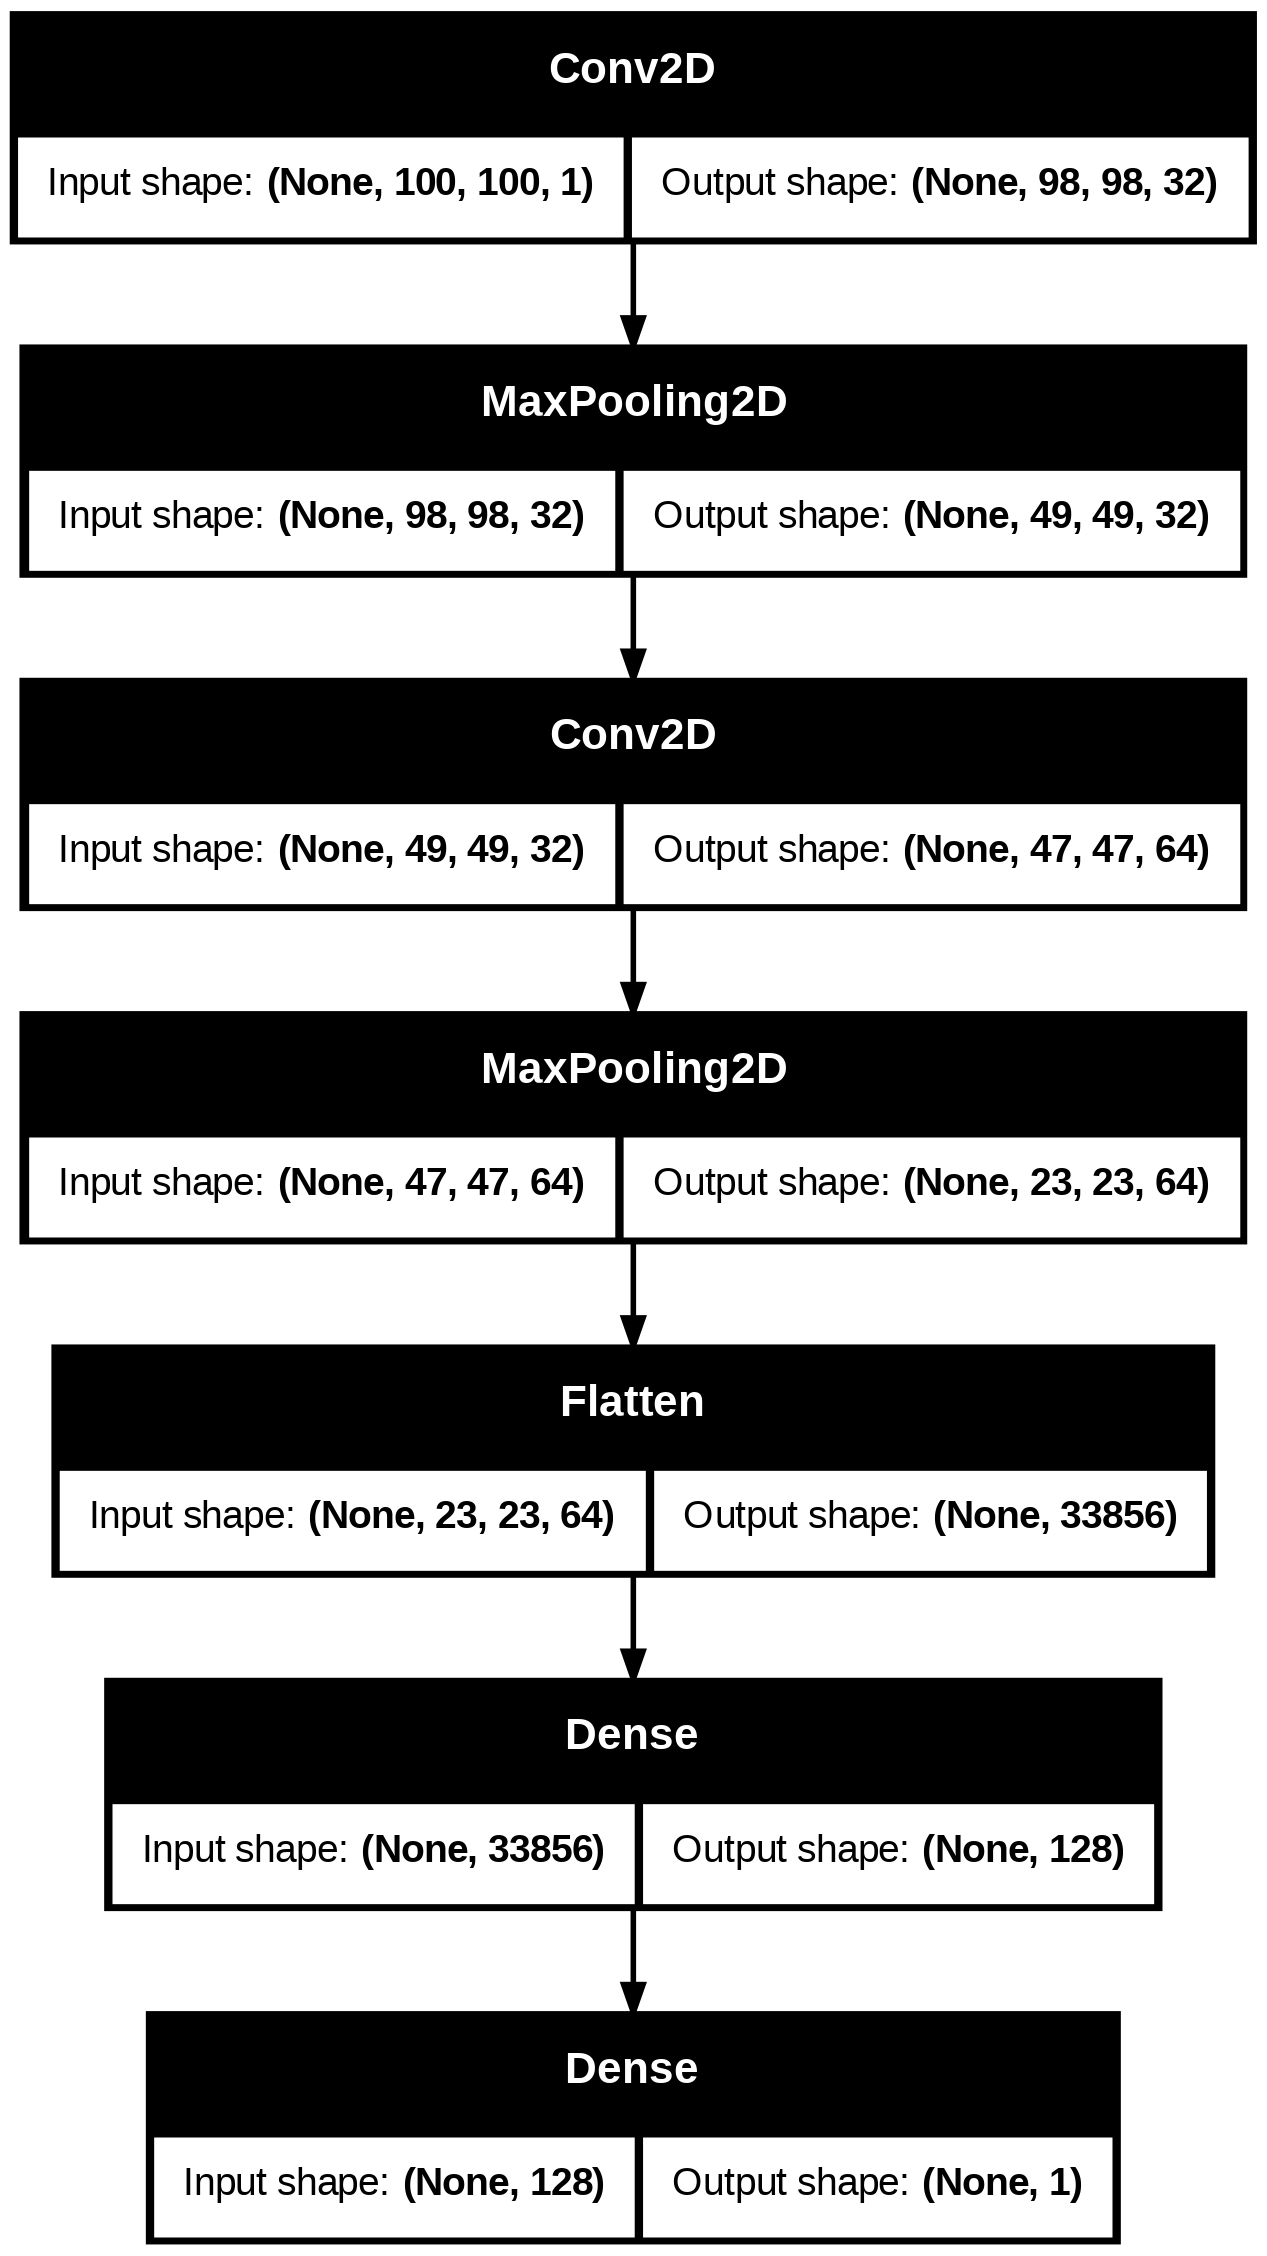

In [129]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
AUC Score: 0.869


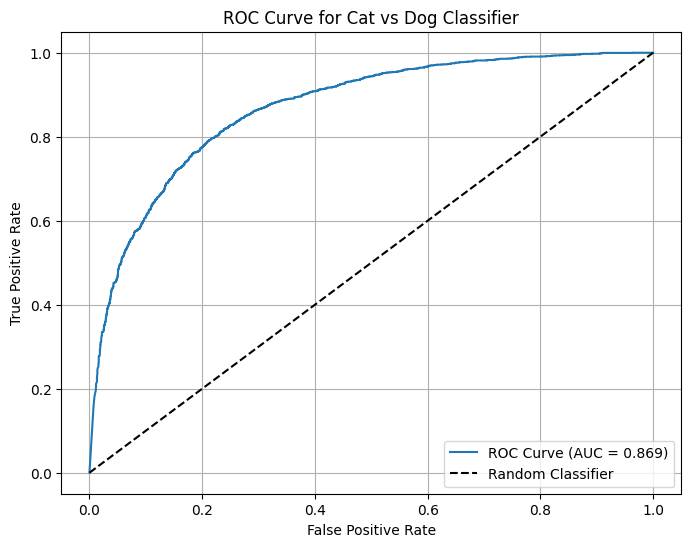

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get predicted probabilities (for class "cat" = 1)
y_pred_prob = model.predict(x_test).ravel()

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 3. Compute AUC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.3f}")

# 4. Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Cat vs Dog Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Communication of Results


In [124]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057,925 (49.81 MB)

 Trainable params: 4,352,641 (16.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,705,284 (33.21 MB)

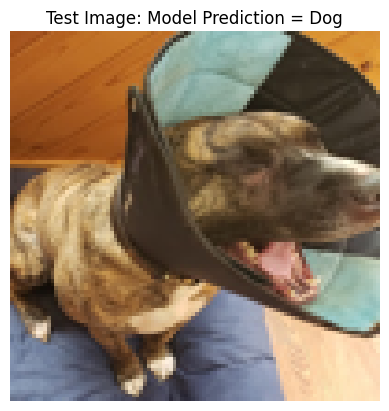

In [125]:
plt.imshow(img)
plt.axis('off')
plt.title("Test Image: Model Prediction = Dog" if prediction[0][0] > 0.5 else "Test Image: Model Prediction = Cat")
plt.show()


* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.